In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [25]:
# Load dataset
df = pd.read_excel('C:\\Users\\ACER\\Documents\\e-shop clothing 2008.xlsx')

In [26]:
# Tampilkan beberapa baris pertama
print(df.head(10))

   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   
5  2008      4    1      6       29           1                       3   
6  2008      4    1      7       29           1                       3   
7  2008      4    1      8       29           1                       4   
8  2008      4    1      9       29           1                       4   
9  2008      4    1      1       29           2                       2   

   colour  location  model photography  price  price 2  page  
0       1         5                  1     28        2     1  
1       1         6                  1     33   

In [27]:
# Proses Cleaning Data
df.isnull().sum()

year                      0
month                     0
day                       0
order                     0
country                   0
session ID                0
page 1 (main category)    0
colour                    0
location                  0
model photography         0
price                     0
price 2                   0
page                      0
dtype: int64

In [28]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [29]:
# Definisikan fitur dan target (x,y)
X = df.drop('year', axis=1)
y = df['year']

In [30]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [32]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [36]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        2008       1.00      1.00      1.00     49643

    accuracy                           1.00     49643
   macro avg       1.00      1.00      1.00     49643
weighted avg       1.00      1.00      1.00     49643

Confusion Matrix:
[[49643]]


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


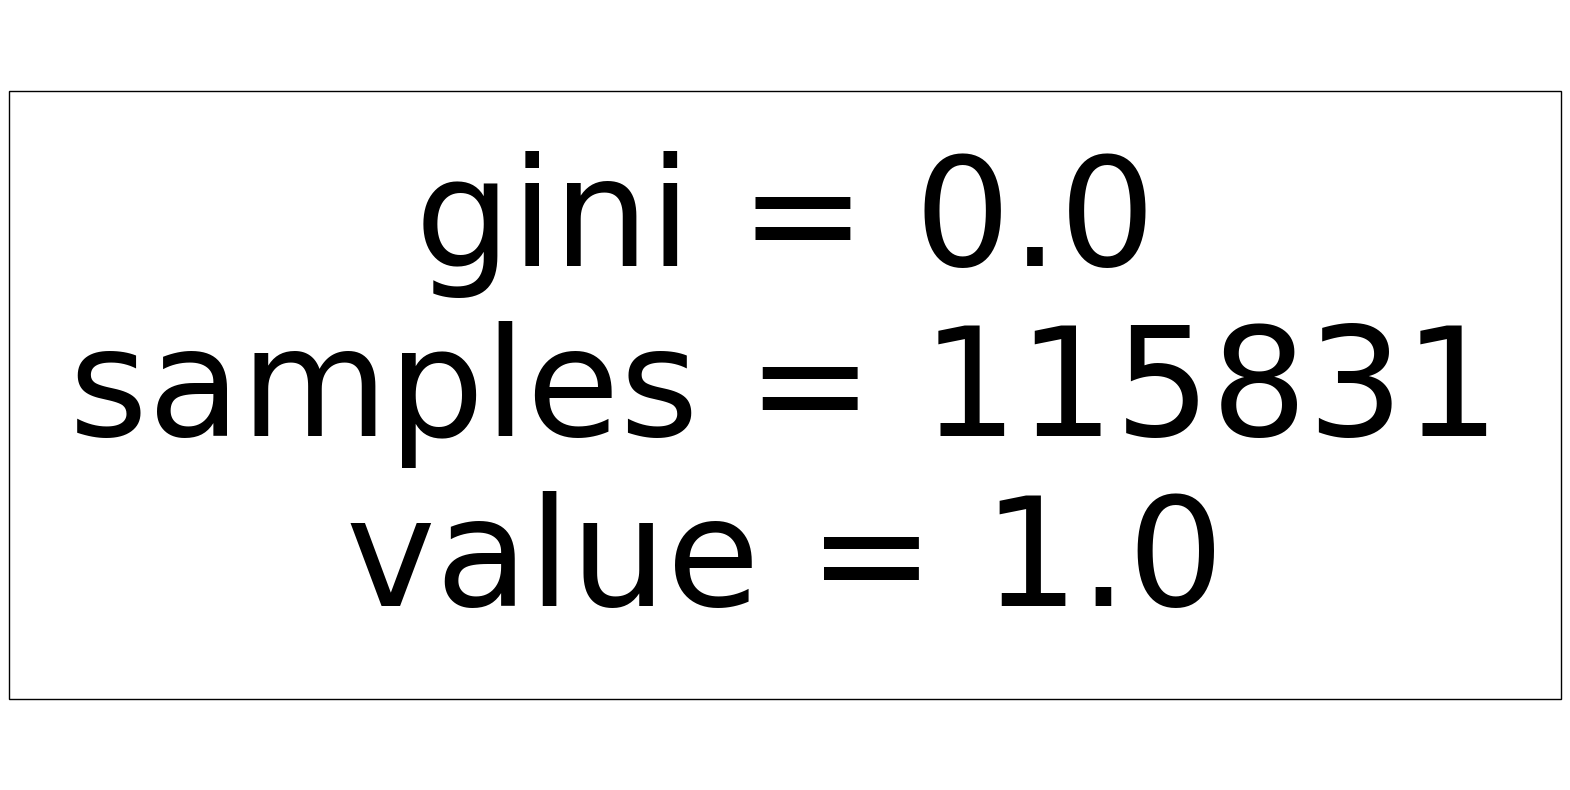

In [38]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()